In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import gc
from tqdm import tqdm
from cfg import *

In [2]:
from utils import translator, retranslator, text_to_input
from get_data import get_emnist
from models import GAN

/home/tomek/anaconda3/envs/gpu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


EMNIST TEST

In [3]:
mtrain, number_train, mtest, number_test = get_emnist()

In [4]:
gan = GAN()

In [5]:
lr = 0.0001

gan.model.optimizer.lr.assign(lr)
gan.discriminator.optimizer.lr.assign(lr) 

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-04>

100%|██████████| 1500/1500 [00:49<00:00, 30.38it/s]


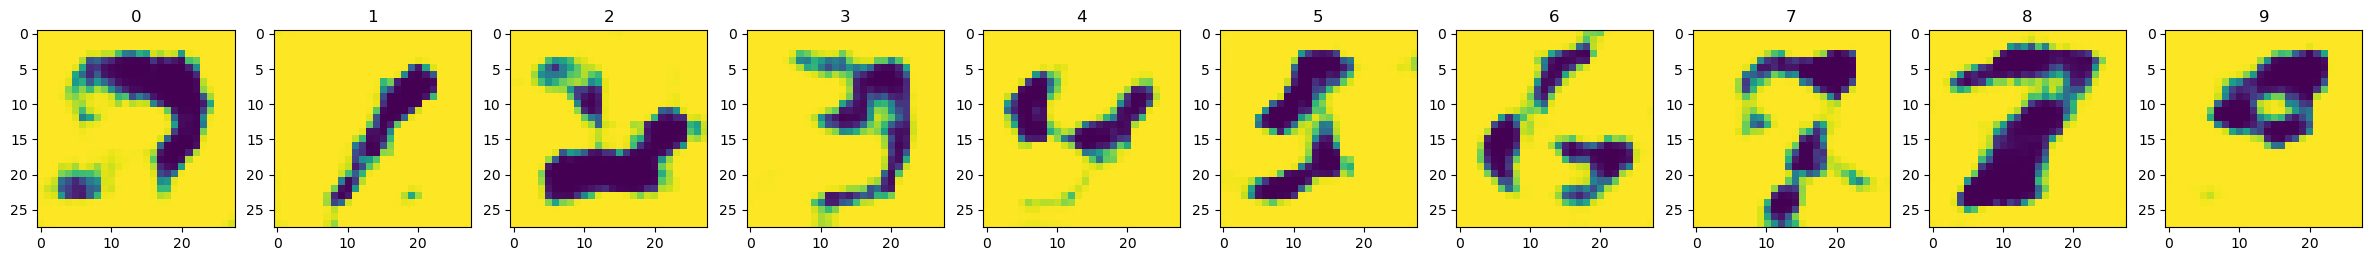

100%|██████████| 1500/1500 [00:46<00:00, 32.51it/s]


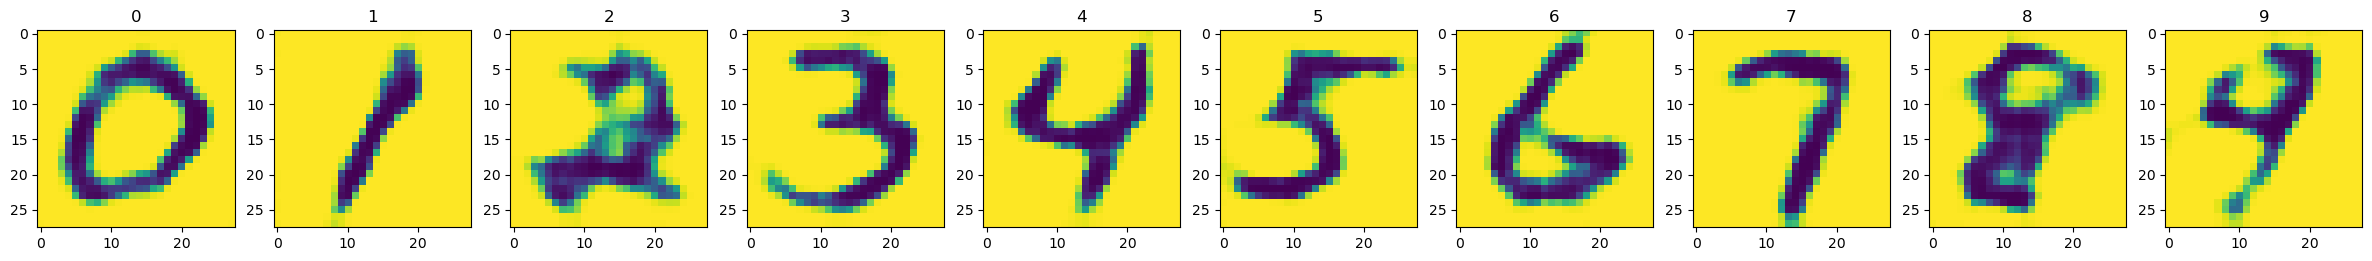

100%|██████████| 1500/1500 [00:45<00:00, 32.75it/s]


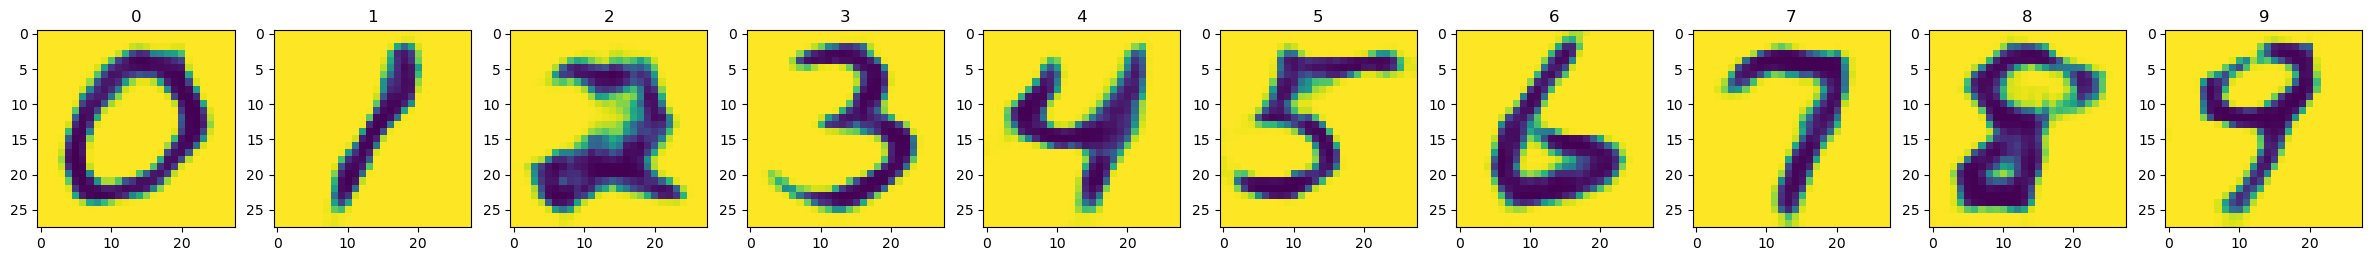

100%|██████████| 1500/1500 [00:44<00:00, 33.49it/s]


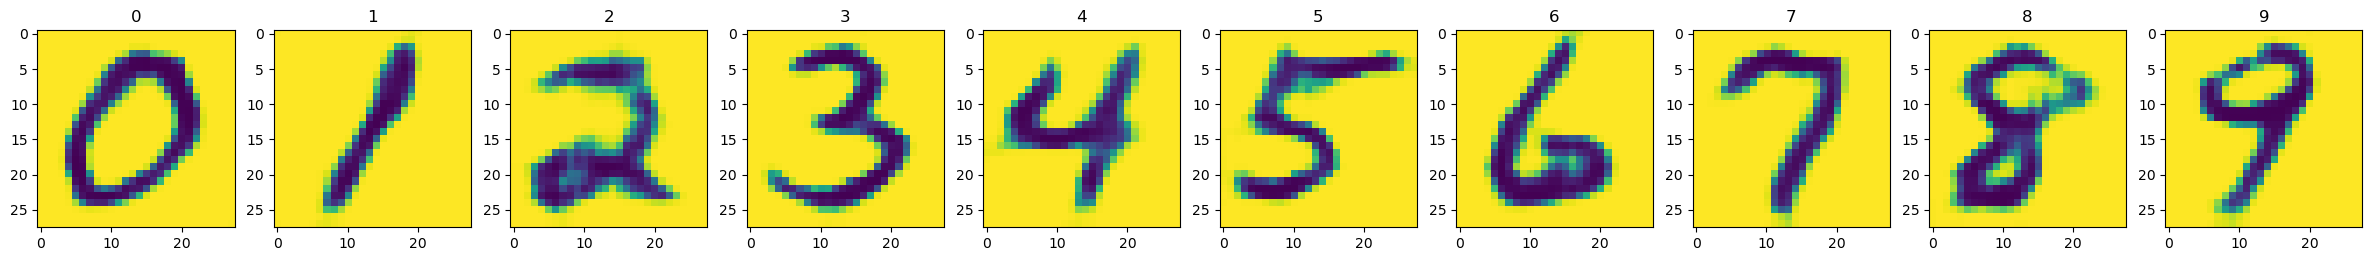

In [6]:
n = 10
rand = np.random.normal(0, 1, (n, LATENT_DIM))
rand_num = np.arange(0,n)
rand.shape

for e in range(4):
    gan.train(mtrain.numpy(), number_train.numpy(), 1500, 64, True, False, add_mixed=False)
    
    fig, ax = plt.subplots(1, rand.shape[0], figsize=(rand.shape[0]*3, 3))
    generated = gan.generator([rand, rand_num])
    prob = gan.discriminator(generated).numpy().reshape(-1,N_CLASS)
    for g,a,pr,num in zip(generated, ax, prob,rand_num):
        a.imshow( g )
        pr_title = str(int(pr[num]*100))[:2]
        a.set_title(f"{num}")  #{pr_title}")
    plt.show()

In [7]:

score = (gan.discriminator.predict( mtest ).round(0).sum(1) == 0).mean()
print(f"Discriminator's accuracy: {int(score*100)}%")

Discriminator's accuracy: 40%


In [8]:
score = (number_test  == np.argmax(gan.discriminator.predict( mtest ),1)).numpy().mean()
print(f"Generator's accuracy: {int(score*100)}%")

Generator's accuracy: 84%


(10, 50) (10,)


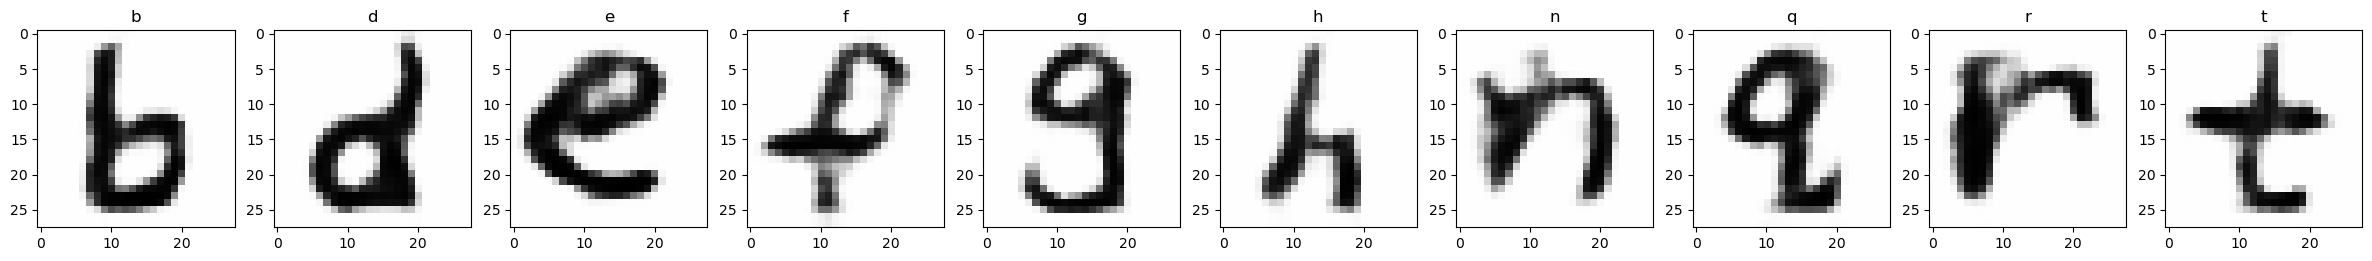

(10, 50) (10,)


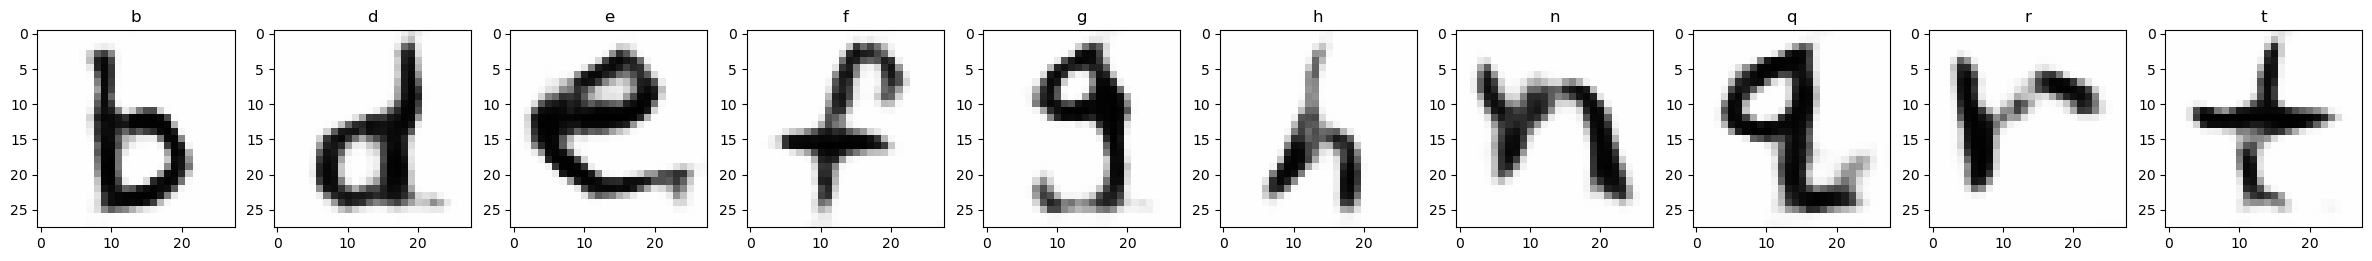

(10, 50) (10,)


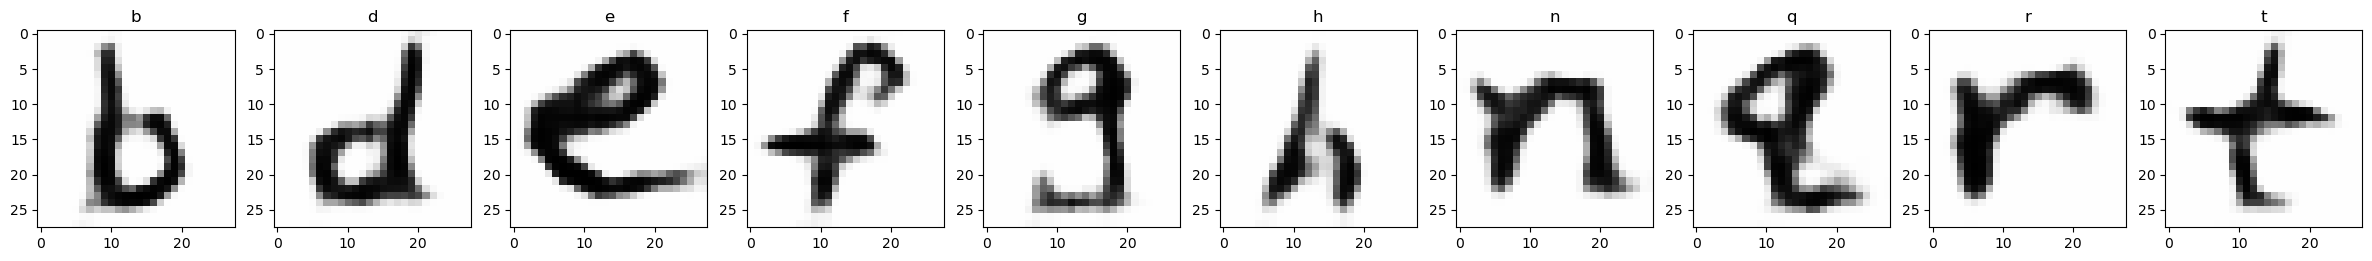

(10, 50) (10,)


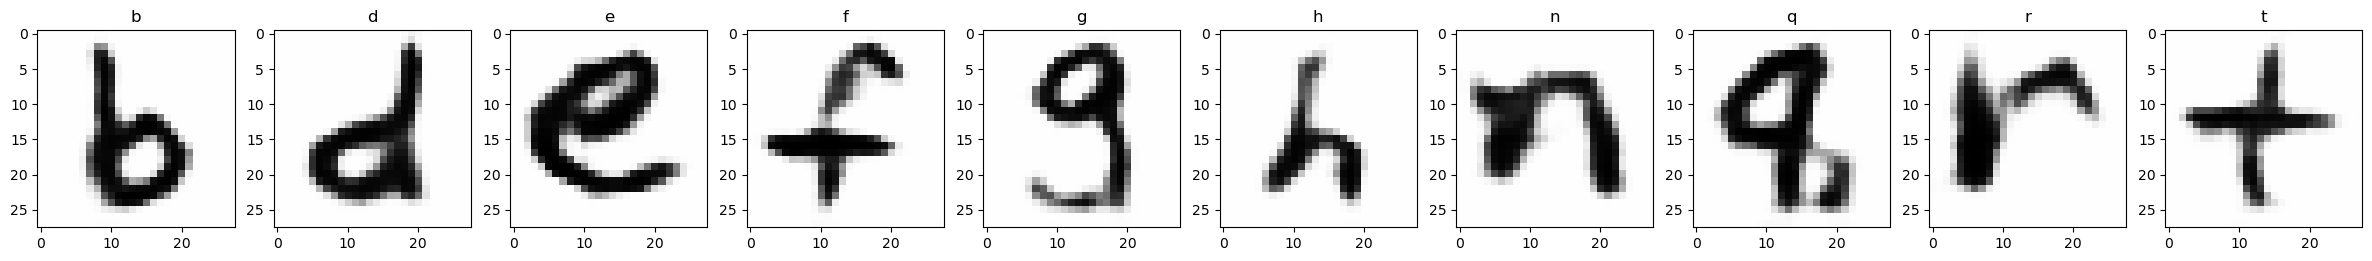

(10, 50) (10,)


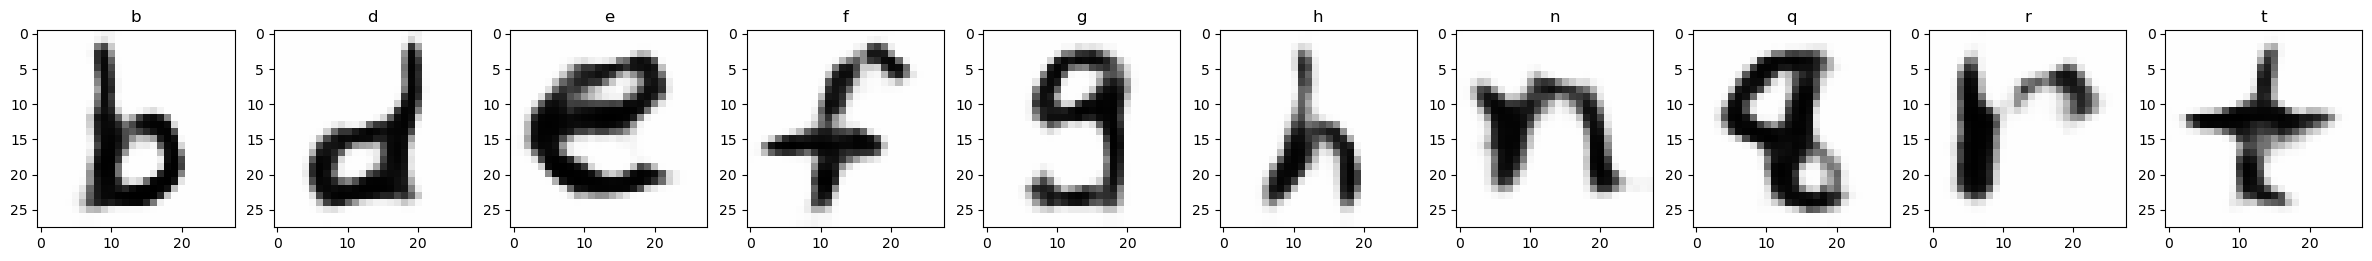

(10, 50) (10,)


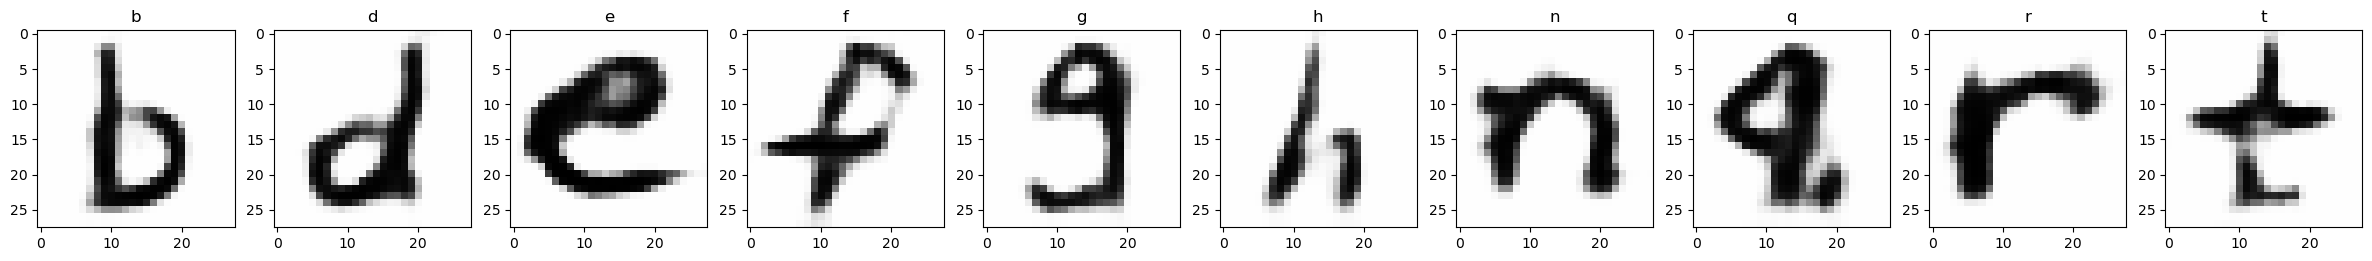

(10, 50) (10,)


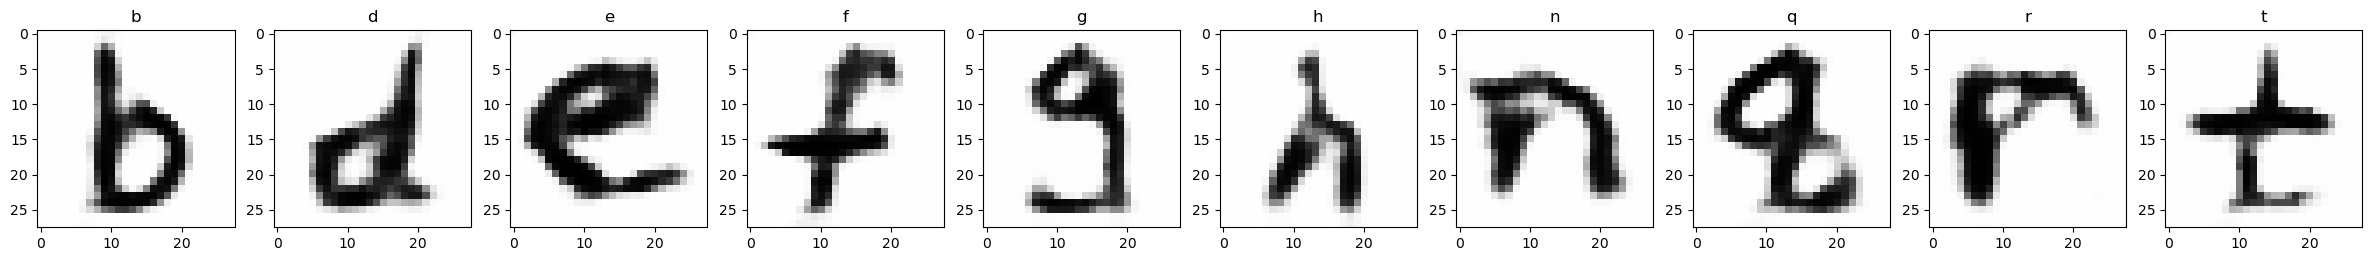

In [9]:

startn = 37
for e in range(7):
    n = 10
    rand = np.repeat(np.random.normal(0, 1, (1, LATENT_DIM)),n,axis=0)
    rand_num = np.arange(startn,startn+n)
    print(rand.shape,rand_num.shape)
    fig, ax = plt.subplots(1, rand.shape[0], figsize=(rand.shape[0]*3, 3))
    generated = gan.generator([rand, rand_num])
    prob = gan.discriminator(generated).numpy().reshape(-1,N_CLASS)
    for g,a,pr,num in zip(generated, ax, prob,rand_num):
        rm = tf.reduce_mean(g,-1, keepdims=True)
        rm = tf.concat([rm]*3,-1)
        
        a.imshow( rm )
        pr_title = str(int(pr[num]*100))[:2]
        a.set_title(translator[num])  #{pr_title}")
    plt.show()


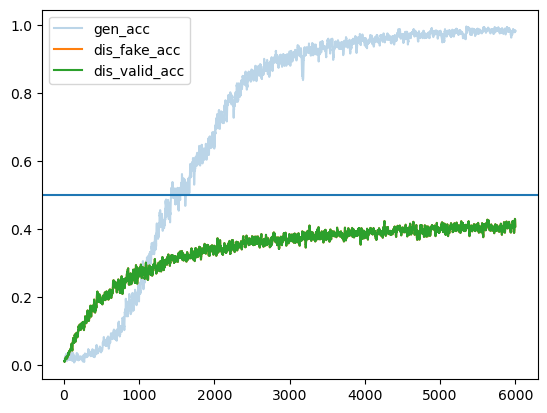

In [10]:
from pandas import Series
plt.plot( Series(gan.gen_acc).rolling(10).mean(), label='gen_acc', alpha=0.3)
plt.plot( Series(gan.dis_fake_acc).rolling(10).mean(), label='dis_fake_acc')
plt.plot( Series(gan.dis_valid_acc).rolling(10).mean(), label='dis_valid_acc'); plt.legend(); plt.axhline(0.5); plt.show()

In [11]:
np.save('weights/generator.npy', gan.generator.get_weights() )
np.save( 'weights/discriminator.npy',  gan.discriminator.get_weights(),)